In [26]:
import pyspark
import random
import time

from pyspark.sql.functions import *

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Custom Details").getOrCreate()


In [17]:
movies = 50
users = 100
records = 1000

data =[]
for _ in range(records):
    m_id = random.randint(1,movies)
    u_id = random.randint(1,users)
    rating = random.randint(1,5)
    time_stamp = random.randint(1000000000,int(time.time()))
    data.append((m_id,u_id,rating,time_stamp))

schema = ['MovieID', 'UserID', 'Rating' ,'Timestamp']
df = spark.createDataFrame(data,schema = schema)

C:\Users\ranju\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [18]:
df.show()

+-------+------+------+----------+
|MovieID|UserID|Rating| Timestamp|
+-------+------+------+----------+
|     29|    80|     3|1175957855|
|     28|    28|     5|1162353719|
|     32|    19|     3|1390879621|
|      9|    64|     5|1107970811|
|     25|    65|     1|1680127977|
|     40|    13|     1|1343808818|
|     16|    40|     2|1698311739|
|     17|    15|     4|1686104878|
|     34|    63|     5|1143843502|
|      5|    60|     1|1363827172|
|     21|    83|     5|1584532215|
|     32|    26|     3|1166419704|
|     17|    42|     5|1364159964|
|     40|    16|     2|1264967818|
|     15|    79|     4|1568441913|
|     41|    14|     1|1502060726|
|     11|    53|     3|1479732744|
|      9|    40|     3|1199087655|
|      7|    53|     3|1655599971|
|     37|    95|     4|1596614730|
+-------+------+------+----------+
only showing top 20 rows



In [25]:
from pyspark.sql.functions import from_unixtime
df = df.withColumn("Readable_Timestamp", from_unixtime(df.Timestamp))
df.show()

+-------+------+------+----------+-------------------+
|MovieID|UserID|Rating| Timestamp| Readable_Timestamp|
+-------+------+------+----------+-------------------+
|     29|    80|     3|1175957855|2007-04-07 20:27:35|
|     28|    28|     5|1162353719|2006-11-01 09:31:59|
|     32|    19|     3|1390879621|2014-01-28 08:57:01|
|      9|    64|     5|1107970811|2005-02-09 23:10:11|
|     25|    65|     1|1680127977|2023-03-30 03:42:57|
|     40|    13|     1|1343808818|2012-08-01 13:43:38|
|     16|    40|     2|1698311739|2023-10-26 14:45:39|
|     17|    15|     4|1686104878|2023-06-07 07:57:58|
|     34|    63|     5|1143843502|2006-04-01 03:48:22|
|      5|    60|     1|1363827172|2013-03-21 06:22:52|
|     21|    83|     5|1584532215|2020-03-18 17:20:15|
|     32|    26|     3|1166419704|2006-12-18 10:58:24|
|     17|    42|     5|1364159964|2013-03-25 02:49:24|
|     40|    16|     2|1264967818|2010-02-01 01:26:58|
|     15|    79|     4|1568441913|2019-09-14 11:48:33|
|     41| 

In [27]:
average_ratings = df.groupBy("MovieID").agg(avg("Rating").alias("Average_Rating"))

average_ratings.show()

+-------+------------------+
|MovieID|    Average_Rating|
+-------+------------------+
|     29|3.2857142857142856|
|     26|              2.48|
|     19|               3.5|
|      7|3.3461538461538463|
|     34| 3.380952380952381|
|     50|              2.52|
|     32|              3.28|
|     43|3.1538461538461537|
|     31|2.5714285714285716|
|     39|3.0526315789473686|
|     25|               3.5|
|      6|2.6666666666666665|
|      9|              2.96|
|     27|3.1904761904761907|
|     17|               3.0|
|     41|3.1818181818181817|
|     28|              3.04|
|     33|2.9285714285714284|
|      5|               2.8|
|      1|               2.7|
+-------+------------------+
only showing top 20 rows



In [30]:
user_count = df.groupBy("UserID").agg(count("Rating").alias("Rating_Count"))
users_ratings = user_count.filter(user_count.Rating_Count > 5)

users_ratings.show()


+------+------------+
|UserID|Rating_Count|
+------+------------+
|    26|          13|
|    65|           7|
|    19|           8|
|    54|           8|
|    22|          10|
|    77|          11|
|    50|          11|
|    32|          14|
|    84|          10|
|    39|          18|
|    95|          13|
|    71|           8|
|     6|          16|
|    87|           9|
|    63|           8|
|    27|           9|
|    52|          12|
|    79|          13|
|    28|          11|
|    88|          11|
+------+------------+
only showing top 20 rows



In [39]:
high_rated = df.groupby('MovieID').agg(avg('Rating').alias("avg_rating"))
top = high_rated.orderBy('avg_rating',ascending = False).limit(5)
top.show()

+-------+------------------+
|MovieID|        avg_rating|
+-------+------------------+
|     35|3.6666666666666665|
|      3|              3.52|
|     19|               3.5|
|     25|               3.5|
|     23|               3.5|
+-------+------------------+



C:\Users\ranju\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


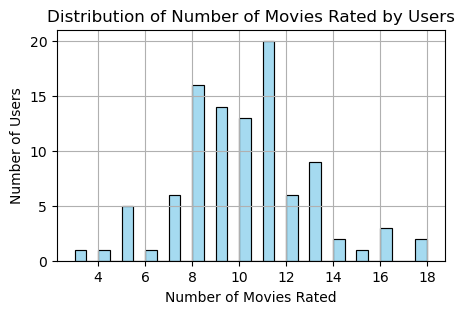

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies rated by each user
user_ratings_count = df.groupBy("UserID").agg(count("MovieID").alias("Movies_Rated"))

# Convert the Spark DataFrame to Pandas DataFrame
user_ratings_count_pd = user_ratings_count.toPandas()

# Plot the visualization
plt.figure(figsize=(5,3))
sns.histplot(user_ratings_count_pd["Movies_Rated"], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Number of Movies Rated by Users")
plt.xlabel("Number of Movies Rated")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()